# Problem Statement:

Here, we are predicting the class which includes values like star, galaxy and quasar with the help of various variables.
We will be using classifciation model as our target variable has categorical data with more than 2 categories

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
#Loading the Dataset
df=pd.read_csv("Space_server.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


Understanding the data and its features/columns:
    1. a. The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.
       b. Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system
       c. The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.
       d. Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels.
       e. specobjid = Object Identifier
       f. Target-> class = object class (galaxy, star or quasar)
    
    2. From above it is observed, there are only 1 categorical data type column which is our target-class.
    3. there are no null values present.
    3. checking the uniqueness of few columns to know its data variation.

In [3]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [4]:
df['objid'].unique()

array([1.23765e+18])

In [5]:
df['specobjid'].unique()

array([3.72236e+18, 3.63814e+17, 3.23274e+17, ..., 5.03345e+17,
       5.03340e+17, 5.03341e+17])

In [6]:
df['rerun'].unique()

array([301], dtype=int64)

In [7]:
df['run'].unique()

array([ 752,  756,  308,  727,  745, 1035, 1045, 1140, 1231, 1332, 1334,
       1302, 1239, 1119, 1331, 1345, 1350, 1404, 1412, 1336, 1402, 1411,
       1356], dtype=int64)

In [8]:
df['camcol'].unique()

array([4, 2, 1, 5, 6, 3], dtype=int64)

From above, it is observed that the columns 'objid' and 'rerun' has only single data which is not useful for prediction.
Hence will drop these coumns.

In [9]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

From above also it is ascertained that class has categorical/object dtype while other columns has int/float dtype.

In [10]:
#Dropping non-relevant columns

df.drop(['objid','rerun' ], axis=1, inplace=True)

In [11]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [12]:
df.shape

(10000, 16)

In [13]:
df.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

From above, it is confirmed that there is no null value in the dataset

In [14]:
df.isnull().values.any()

False

In [15]:
#Statistical Summary
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Key observation:

1. mean is greater than median in dec, run, plate columns, hence the data has skewness.
2. since the difference between 75% and max values are huge in most of the columns, there could be outliers also present in the data.
3. All the column has same count, hence no null values present.

In [16]:
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

There are skewness present in the data, will have to treat the same.

Here, keeping the threshold value as +/- 1 for skewness

# Visualization

Will be checking the above observations through some visualization technique

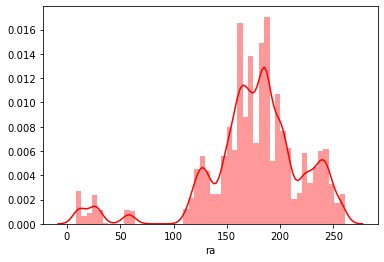

In [17]:
#Univariate Analysis- checking skewness
sns.distplot(df['ra'], color='r')

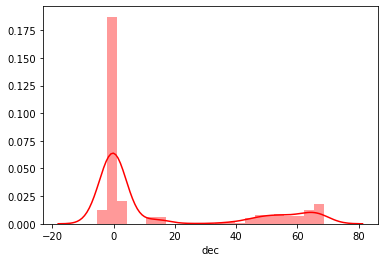

In [18]:
sns.distplot(df['dec'],color='r')

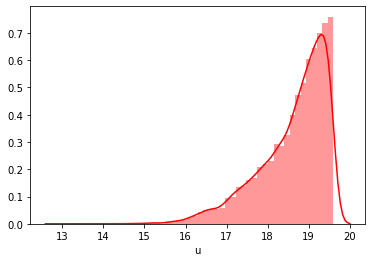

In [19]:
sns.distplot(df['u'],color='r')

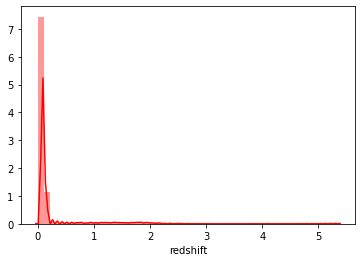

In [20]:
sns.distplot(df['redshift'],color='r')

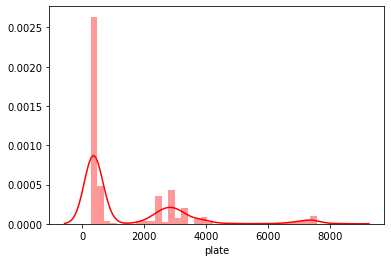

In [21]:
sns.distplot(df['plate'],color='r')

From above, it can be observed that the data is not normally distributed which needs to be treated.

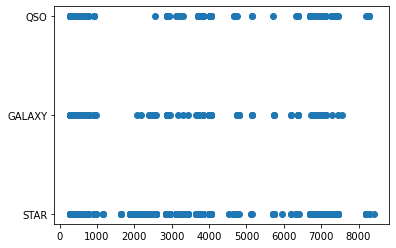

In [22]:
#bivariate analysis

plt.scatter(df['plate'],df['class'])

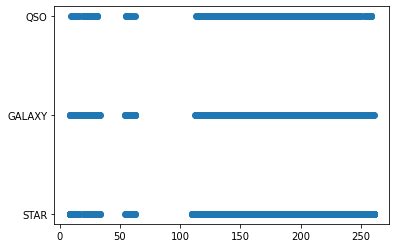

In [23]:
plt.scatter(df['ra'],df['class'])

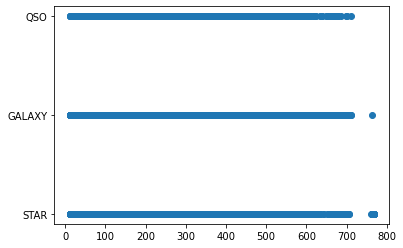

In [24]:
plt.scatter(df['field'],df['class'])

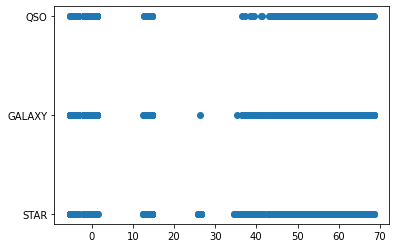

In [25]:
plt.scatter(df['dec'],df['class'])

from above scatter plots, we can notice the distribution of the data and its range with the target variable

In [26]:
#Changing categorical datatype column-target variable which is 'class' for correlation visualization

import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['class']=le.fit_transform(df['class'])

In [27]:
df['class'].unique()

array([2, 0, 1])

Here, 0 denotes Galaxy, 1 denotes quasar and 2 denotes Star

In [28]:
df

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


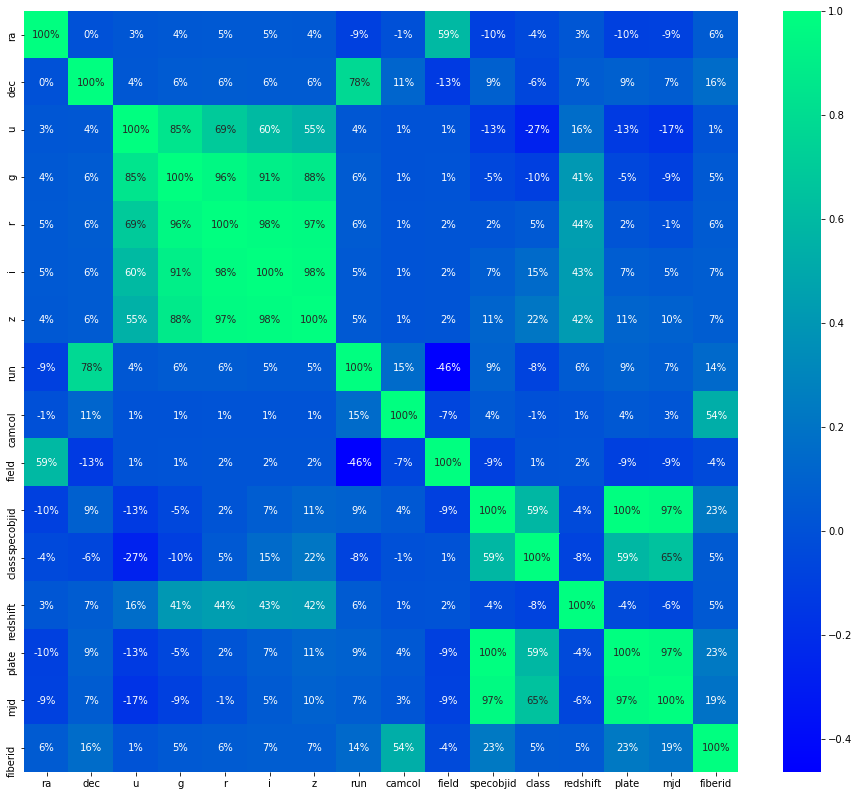

In [31]:
#Checking Correlation with multivariate analysis

plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),annot=True, fmt='.0%',cmap='winter')

Observations:
    1. mjd has highest correlation of 65% with the target-class
    2. plate & specobjid has 59%, other columns has distributed correlation with target.
    3. field and camcol has very less correlation with target.

Text(0.5, 1.0, 'correlation with target variable')

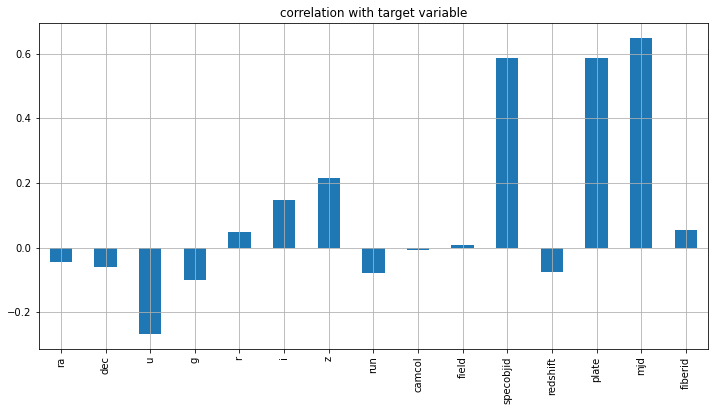

In [35]:
plt.figure(figsize=(12,6))
df.drop('class', axis=1).corrwith(df['class']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('correlation with target variable')

Here also we can observe mjd has highest correlation with target variable

0    4998
2    4152
1     850
Name: class, dtype: int64


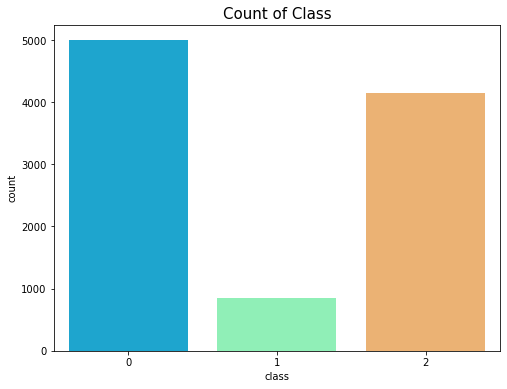

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='class',data=df,palette='rainbow')
plt.title('Count of Class',fontsize=15)

print(df['class'].value_counts())

Here, the no of galaxies are more

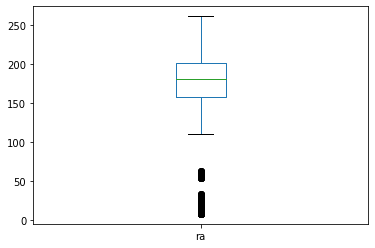

In [40]:
#Checking the outliers

df['ra'].plot.box()

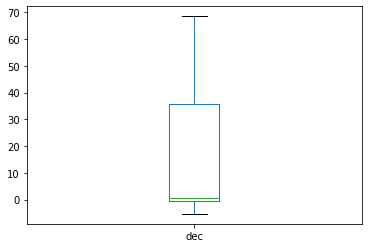

In [41]:
df['dec'].plot.box()

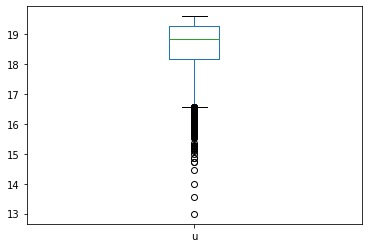

In [42]:
df['u'].plot.box()

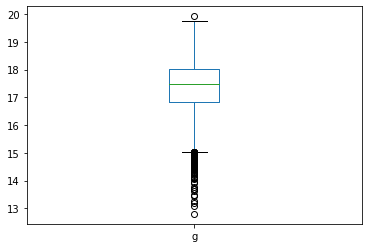

In [43]:
df['g'].plot.box()

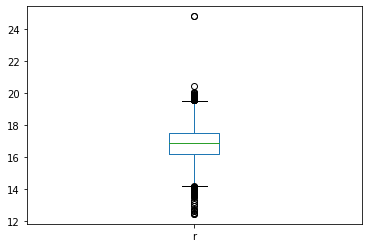

In [44]:
df['r'].plot.box()

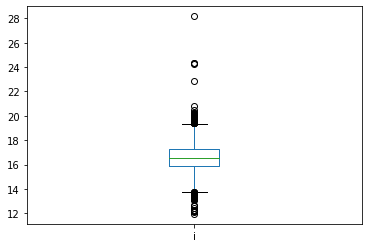

In [45]:
df['i'].plot.box()

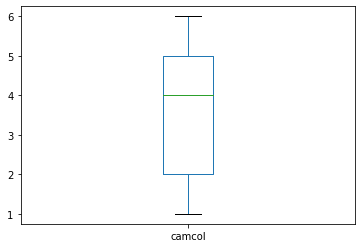

In [46]:
df['camcol'].plot.box()

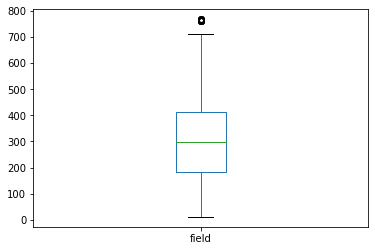

In [47]:
df['field'].plot.box()

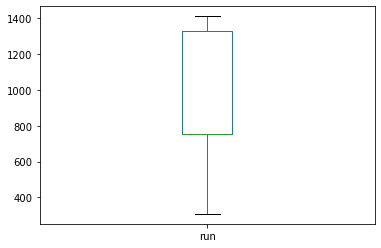

In [48]:
df['run'].plot.box()

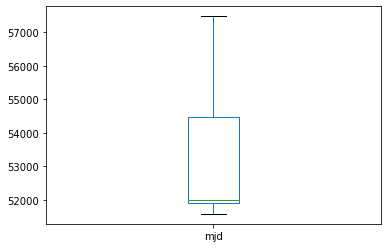

In [49]:
df['mjd'].plot.box()

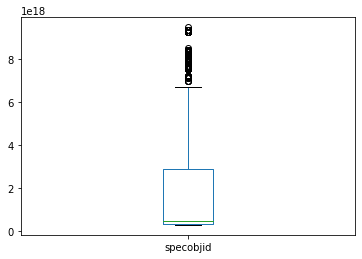

In [50]:
df['specobjid'].plot.box()

From above, we can notice that there are no of outliers present in the data, hence will go ahead with removing them.

# Data Pre-processing

In [51]:
#Removing Outliers

In [52]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))

In [53]:
threshold=3
new_df=df[(z<3).all(axis=1)]

In [54]:
df.shape

(10000, 16)

In [55]:
new_df.shape

(8698, 16)

In [58]:
#Treating skewness

In [59]:
#first, we are defining the x & y
x=new_df.drop('class',axis=1)
y=new_df['class']

In [60]:
x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0.014019,447,51877,229


In [61]:
y

0       2
1       2
2       0
3       2
4       2
       ..
9993    0
9995    0
9996    0
9998    0
9999    0
Name: class, Length: 8698, dtype: int32

As we have defined x & y, will treat skewness now on x variables only

In [62]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [63]:
new_df.skew()

ra          -0.130951
dec          1.212911
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    1.320102
class        0.292107
redshift     4.951700
plate        1.320088
mjd          0.963989
fiberid      0.065374
dtype: float64

In [64]:
#scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [66]:
#Finding best Random_state

In [67]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
#splitting the data

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [70]:
#Checking different models

In [71]:
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9832810867293625
[[1053    5   17]
 [  10   74    0]
 [   0    0  755]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1075
           1       0.94      0.88      0.91        84
           2       0.98      1.00      0.99       755

    accuracy                           0.98      1914
   macro avg       0.97      0.95      0.96      1914
weighted avg       0.98      0.98      0.98      1914



In [72]:
dtc=DecisionTreeClassifier(criterion='gini')

dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)

print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9843260188087775
[[1057   17    1]
 [  11   73    0]
 [   1    0  754]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1075
           1       0.81      0.87      0.84        84
           2       1.00      1.00      1.00       755

    accuracy                           0.98      1914
   macro avg       0.93      0.95      0.94      1914
weighted avg       0.98      0.98      0.98      1914



In [73]:
knn=KNeighborsClassifier(10)

knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9524555903866249
[[1018    5   52]
 [  17   67    0]
 [  17    0  738]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1075
           1       0.93      0.80      0.86        84
           2       0.93      0.98      0.96       755

    accuracy                           0.95      1914
   macro avg       0.94      0.91      0.92      1914
weighted avg       0.95      0.95      0.95      1914



In [74]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)

enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.7253539082880986


array([-0.0095737 , -0.0103507 , -0.3439064 ,  1.29650983, -2.71998524,
        0.80088753,  1.15154748,  0.        , -0.00500999,  0.01170181,
        0.        , -0.64128705,  0.        ,  0.        ,  0.00729462])

We will be saving the knn model as other could have over fitting in them.

# Model Saving

In [76]:
import pickle
filename= 'Space_server.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [77]:
import numpy as np
a=np.array(y_test)
predicted=np.array(knn.predict(x_test))

df_con=pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_con

,original,predicted
0,2,2
1,0,0
2,2,2
3,0,0
4,2,2
...,...,...
1909,0,0
1910,2,2
1911,0,0
1912,2,2


Almost all the predictions are accurate.